# GBM STEPS

### 1)Import and split
### 2)Set and fit the model
### 3)Predict
### 4)Model Tuning
### 5)Find best params, set and fit the model again, find final RMSE.

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Import data and split it

In [2]:
hit = pd.read_csv("../input/hittlers/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
#Set and fit the model

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
gbm_model= GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Important Parameters
#learning_rate
#n_estimators should begin with 1000 for GBM and XG Boost
#max_depth
#subsample

In [ ]:
#Prediction

In [5]:
y_pred=gbm_model.predict(X_test)

In [6]:
np.sqrt(mean_squared_error(y_pred,y_test))

353.3338766697489

In [ ]:
#Model Tuning

In [7]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [8]:
gbm= GradientBoostingRegressor()
gbm_cv_model= GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)  #verbose gives us some information 
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 15.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [9]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.75}

In [10]:
gbm_tuned_model= GradientBoostingRegressor(learning_rate= 0.2,
                                           max_depth= 3,
                                           n_estimators=500, subsample= 0.75)

In [11]:
gbm_tuned_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
y_pred=gbm_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred,y_test))    #test error

344.0481628514967

In [ ]:
# We found 413 for KNN, 
#          367 for SVR,
#          363 for Artifical Neural Network.
#          376 for CART
#          349 for Bagged Trees
#          350 for Random Forest
#And now,  344 for GBM

#In these models, the best one is GBM model for "hitters" data set, till now.

In [16]:
# VARIABLES' IMPORTANCE LEVEL  (BONUS PART)

In [14]:
Importance = pd.DataFrame({"Importance": gbm_tuned_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, "Variables' Importance Level")

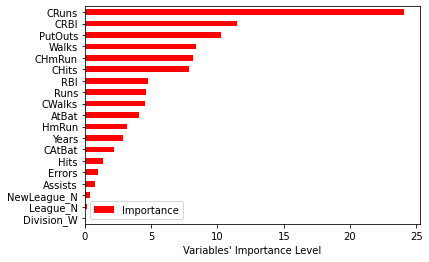

In [15]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variables' Importance Level")

#### SPECIAL THANKS TO https://github.com/mvahit/DSMLBC